In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [6]:
train = pd.read_csv('data/titanic.csv')
age = train['Age']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Качественные переменные

Sex
male      577
female    314
Name: count, dtype: int64


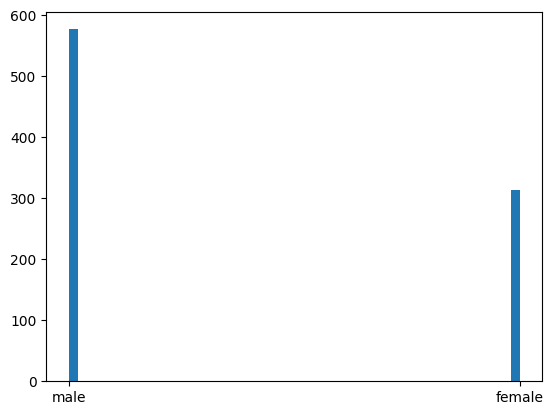

In [7]:
Sex = train['Sex']
fig, ax = plt.subplots()
plt.hist(Sex, bins=50)
ax.set_ylabel("")
ax.set_xlabel("")
print(Sex.value_counts())

## Ранговые переменные

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


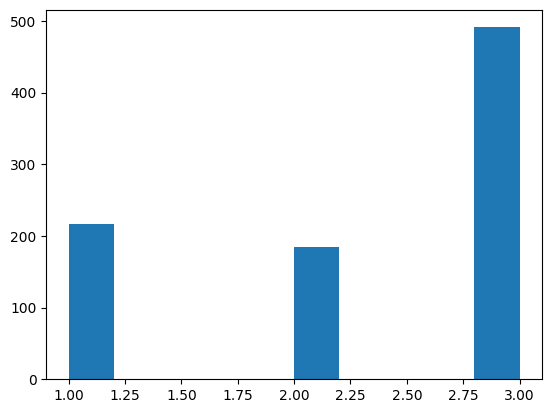

In [8]:
Pclass = train['Pclass']
fig, ax = plt.subplots()
plt.hist(Pclass)
ax.set_ylabel("")
ax.set_xlabel("")
print(Pclass.value_counts())

## Количественные переменные

### Непрерывной переменной будет возраст

Text(0.5, 0, '')

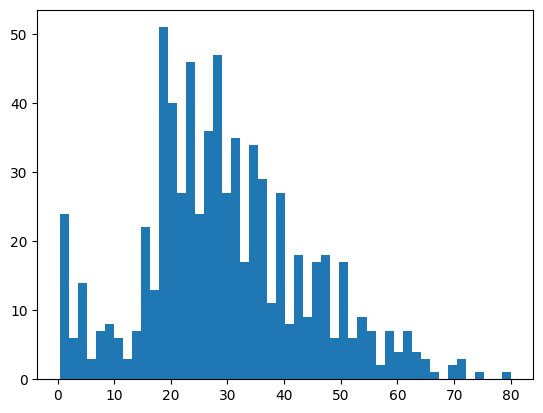

In [9]:
fig, ax = plt.subplots()
plt.hist(age, bins=50)
ax.set_ylabel("")
ax.set_xlabel("")

### Дискретной переменной будет количество братьев и сестер/супругов на борту

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


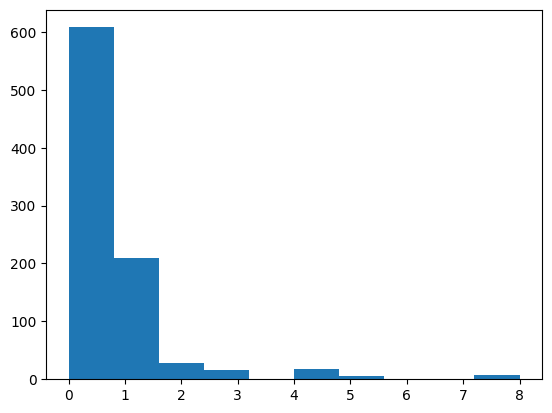

In [10]:
SibSp = train['SibSp']
fig, ax = plt.subplots()
plt.hist(SibSp)
ax.set_ylabel("")
ax.set_xlabel("")
print(SibSp.value_counts())

## Меры центральной тенденции

### Мода

In [ ]:
from scipy import stats

age_without_nan = age.to_numpy()
age_without_nan = age[~np.isnan(age_without_nan)]

mode = stats.mode(age_without_nan)
print('Мода =', mode.mode)


### Медиана

In [ ]:
median = np.median(age_without_nan)
print('Медиана =', median)

Медиана = 28.0


### Среднее значение

In [ ]:
mean = np.mean(age_without_nan)
print('Среднее значение =', mean)

Среднее значение = 29.69911764705882


## Распределение выживших в зависимости от пола

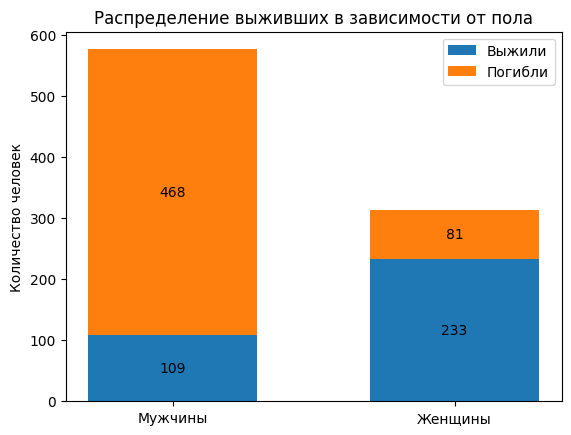

In [ ]:
# Посчитаем общее количество мужчин и женщин, а также количество выживших
males_total = len(train.loc[(train['Sex'] == 'male')])
females_total = len(train.loc[(train['Sex'] == 'female')])
males_survived = len(train.loc[((train['Sex'] == 'male') & (train['Survived'] == 1))])
females_survived = len(train.loc[((train['Sex'] == 'female') & (train['Survived'] == 1))])

#Визуализируем
survivors_counts = {
    'Выжили': [males_survived, females_survived],
    'Погибли': [males_total-males_survived, females_total-females_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('Мужчины', 'Женщины'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от пола')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

## Распределение пассажиров по возрастам

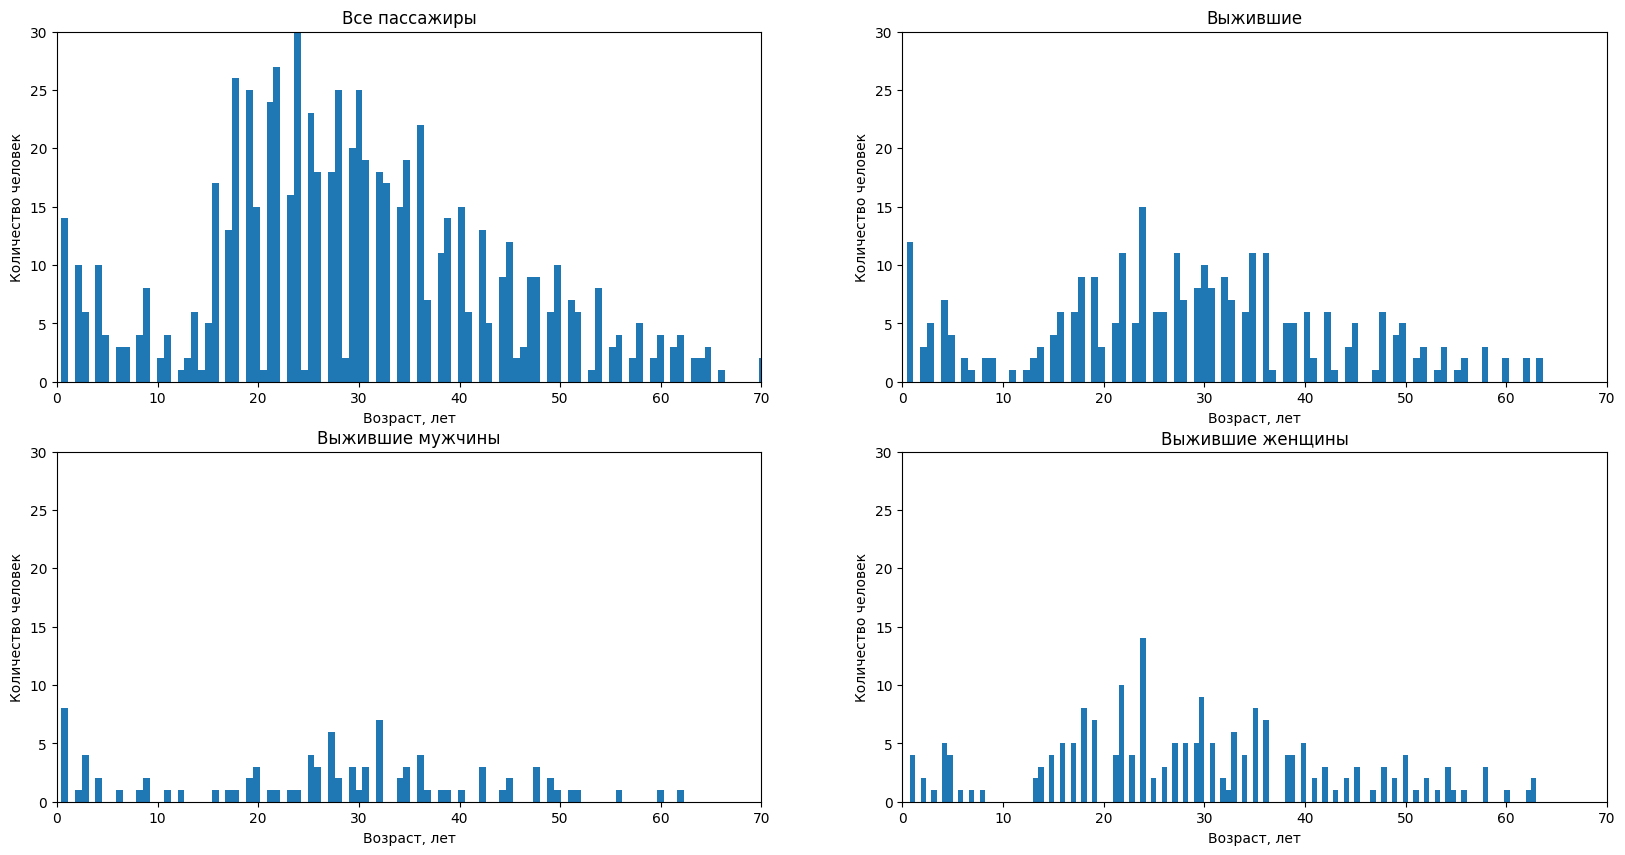

In [ ]:
from collections import Counter

#Выберем списки пассжиров в отдельные группы
survivors = train.loc[(train['Survived'] == 1)]
male_survivors = train.loc[((train['Sex'] == 'male') & (train['Survived'] == 1))]
female_survivors = train.loc[((train['Sex'] == 'female') & (train['Survived'] == 1))]

#Число возрастов
num_of_ages = len(dict(Counter(survivors['Age'])).keys())

#Визуализируем
fig, axs = plt.subplots(2,2)
fig.set_figwidth(20)
fig.set_figheight(10)
names = [['Все пассажиры', 'Выжившие'], ['Выжившие мужчины', 'Выжившие женщины']]
for i, surv in enumerate([[train, survivors], [male_survivors, female_survivors]]):
    for j, subsurv in enumerate(surv):
        axs[i][j].hist(subsurv['Age'], bins=num_of_ages)
        axs[i][j].set_title(names[i][j])
        axs[i][j].set_xlabel('Возраст, лет')
        axs[i][j].set_ylabel('Количество человек')
        axs[i][j].set_ylim(0,30)
        axs[i][j].set_xlim(0,70)
plt.show()

## Распределение выживших среди детей

In [ ]:
import numpy as np

children = train.loc[((train['Age'] < np.float64(18.0)) & (train['Age'] > 0))]
survivors_children = train.loc[((train['Age'] < np.float64(18.0)) & (train['Survived'] == 1) & (train['Age'] > 0))]
print(f'Пасажиров до 18 лет спаслось {round(len(survivors_children)*100/len(children), 2)}%')

Пасажиров до 18 лет спаслось 53.98%


<Axes: >

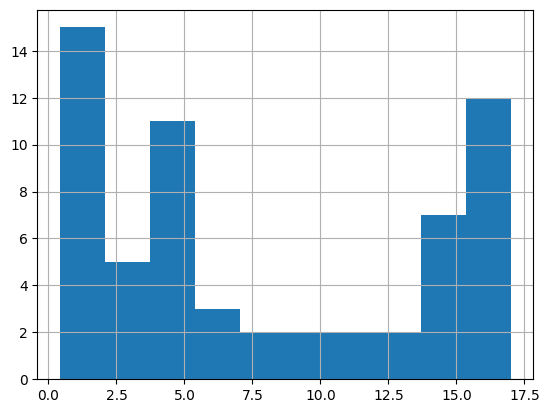

In [ ]:
train.loc[((train['Survived'] == 1) & (train['Age'] > 0) & (train['Age'] < 18))].Age.hist()


## Распределение по возрастам для каждого титула

/var/folders/ln/d1xcl1fd0_l7clh222_qh9gw0000gn/T/ipykernel_47972/2398908099.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(ages.values(), labels=titles, vert=True)


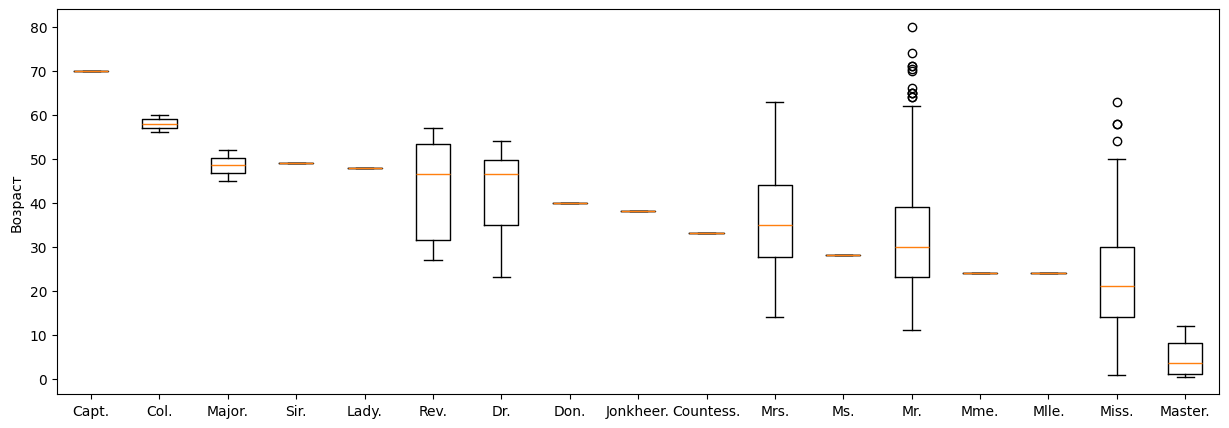

In [ ]:
#Перечень титулов
titles = ("Capt.","Col.","Major.","Sir.","Lady.","Rev.","Dr.","Don.","Jonkheer.","Countess.","Mrs.","Ms.","Mr.","Mme.","Mlle.","Miss.","Master.")

#Создадим список титулов для каждого пассажира
titled_names = []
for name in train.Name:
    for title in titles:
        if title in name.split(' '):
            titled_names.append(title)
            break


#Добавим в датафрейм новый столбец - Титул
train.insert(12, 'Title', titled_names)

#Создадим словарь с парами "титул: список возрастов"
ages = dict.fromkeys(titles, [])
for i, title in enumerate(train.Title):
    if not pd.isna(train.Age[i]):
        ages[title] = ages[title] + [train.Age[i]]

#Визуализируем
fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(ages.values(), labels=titles, vert=True)
ax.set_ylabel('Возраст')
plt.show()

## Соотношение погибших и выживших среди людей без указания возраста

Text(0, 0.5, 'Кол-вол выживших')

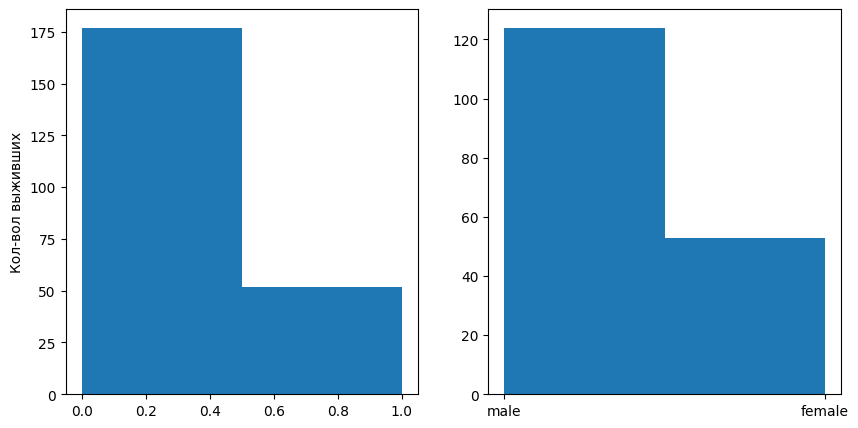

In [ ]:
noage = train.loc[(pd.isna(train['Age']))]
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].hist(noage.Survived, bins=2, cumulative=-1)
ax[1].hist(noage.Sex, bins=2)
ax[0].set_ylabel('Кол-вол выживших')

In [ ]:
# Восстановим возраста, используя медиану среди пассажиров с соответствующим титулом

for i, age in enumerate(train.Age):
    if pd.isna(age):
        train.Age[i] = np.median(ages[train.Title[i]])

## Доля выживших в зависимости от титула

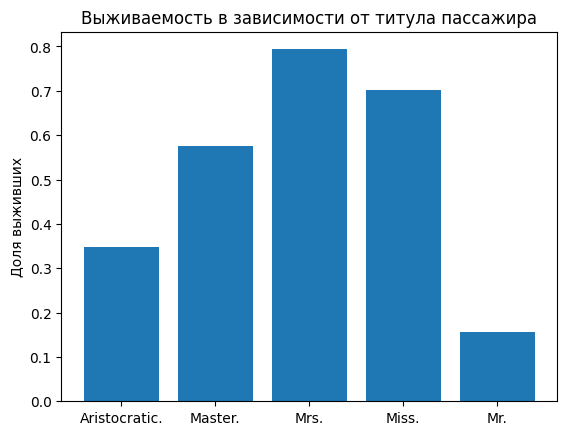

In [ ]:
# Группы для объединения
aristocratic = ("Capt.", "Col.", "Don.", "Dr.",
                "Jonkheer.", "Lady.", "Major.",
                "Rev.", "Sir.", "Countess.")
mrs = ("Ms.")
miss = ("Mlle.", 'Mme.')

# Объединяем титулы
for i, title in enumerate(train.Title):
    if title in aristocratic:
        train.Title[i] = 'Aristocratic.'
    elif title in miss:
        train.Title[i] = 'Miss.'
    elif title in mrs:
        train.Title[i] = 'Mrs.'

# В данном случае будет удобно посмотреть на долю выживших, так как количество людей в каждом из титулов значительно разнится
title_survive_percent = dict.fromkeys(set(train.Title), None)
for title in title_survive_percent.keys():
    title_survive_percent[title] = len(train.loc[((train['Title'] == title) & (train['Survived'] == 1))]) / len(train.loc[(train['Title'] == title)])

#Визуализируем
fig, ax = plt.subplots()
ax.bar(title_survive_percent.keys(), title_survive_percent.values())
ax.set_ylabel('Доля выживших')
ax.set_title('Выживаемость в зависимости от титула пассажира')
plt.show()

## Доля выживших в зависимости от наличия номера кабины

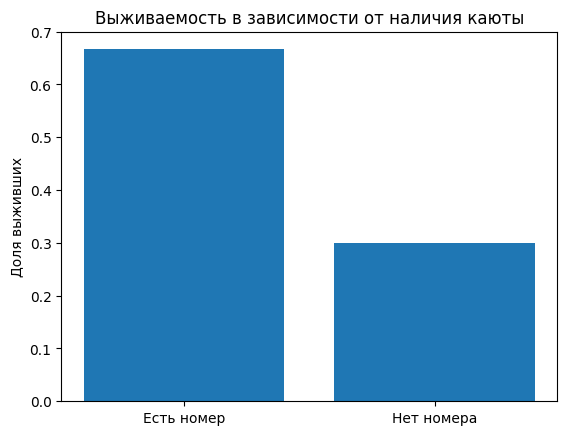

In [ ]:
# Выделим пассажиров в группы
have_cabin = train.loc[(pd.notna(train['Cabin']))]
have_cabin_survived = train.loc[((pd.notna(train['Cabin'])) & (train['Survived'] == 1))]
no_cabin = train.loc[(pd.isna(train['Cabin']))]
no_cabin_survived = train.loc[((pd.isna(train['Cabin'])) & (train['Survived'] == 1))]

# Визуализируем долю выживших
fig, ax = plt.subplots()
ax.bar(('Есть номер', 'Нет номера'), (len(have_cabin_survived)/len(have_cabin), len(no_cabin_survived)/len(no_cabin)))
ax.set_ylabel('Доля выживших')
ax.set_title('Выживаемость в зависимости от наличия каюты')
plt.show()

## Доля выживших для пассажиров с разным количеством родственников

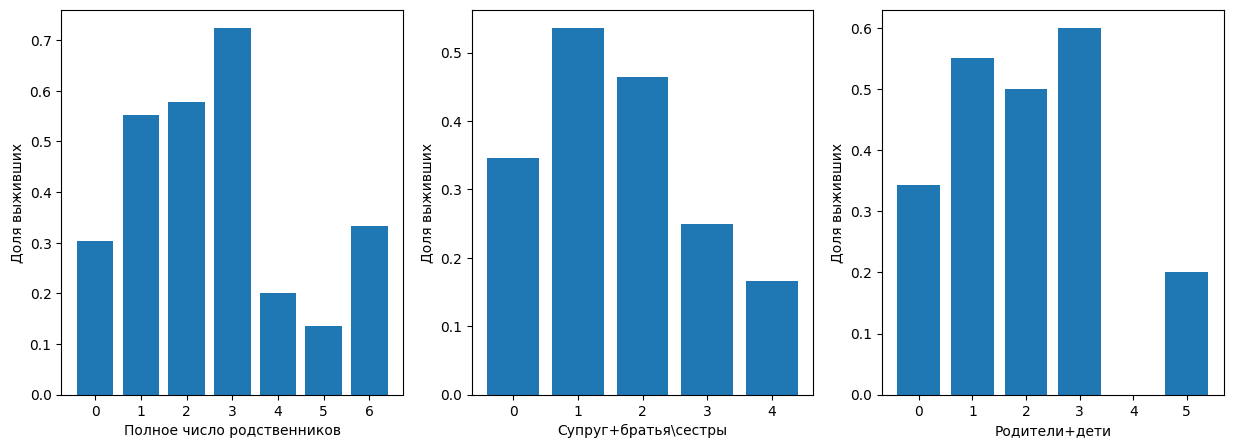

In [ ]:
# Добавим признак family
train.insert(13, 'Family', np.array(train.SibSp, int) + np.array(train.Parch, int))


sibsp_total = dict(Counter(train.SibSp))
parch_total = dict(Counter(train.Parch))
family_total = dict(Counter(train.Family))
sibsp_survived = dict(Counter(train.loc[(train['Survived'] == 1)].SibSp))
parch_survived = dict(Counter(train.loc[(train['Survived'] == 1)].Parch))
family_survived = dict(Counter(train.loc[(train['Survived'] == 1)].Family))
relatives = (family_total, sibsp_total, parch_total)
relatives_survived = (family_survived, sibsp_survived, parch_survived)

fig, axs = plt.subplots(1, 3, figsize=(15,5))
xlabs = ('Полное число родственников', 'Супруг+братья\сестры', 'Родители+дети')

for i in range(3):
    probs = []
    for rel, amount in relatives_survived[i].items():
        probs.append(amount / relatives[i][rel])
    axs[i].bar(relatives_survived[i].keys(), probs)
    axs[i].set_ylabel('Доля выживших')
    axs[i].set_xlabel(xlabs[i])
plt.show()

## Стоимость билета оказывается хорошим признаком, влияющим на выживаемость

/var/folders/ln/d1xcl1fd0_l7clh222_qh9gw0000gn/T/ipykernel_47972/3946567839.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(fare.values(), labels=(1,2,3), vert=True)


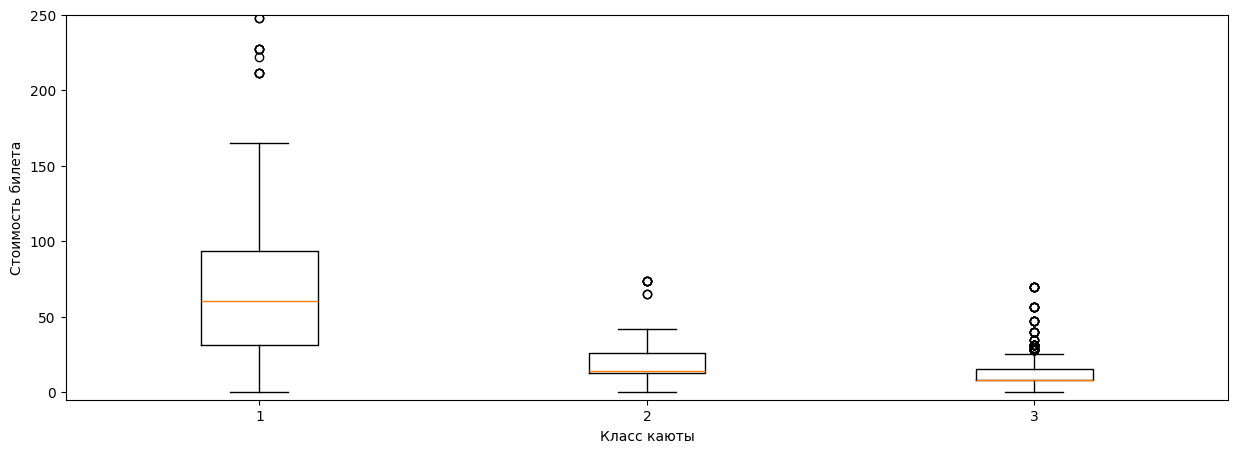

In [ ]:
fare = dict.fromkeys((1,2,3), [])
for i, price in enumerate(train.Fare):
    fare[train.Pclass[i]] = fare[train.Pclass[i]] + [price]


fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(fare.values(), labels=(1,2,3), vert=True)
ax.set_ylabel('Стоимость билета')
ax.set_xlabel('Класс каюты')
ax.set_ylim(-5, 250)
plt.show()